# Estación Cuatro Caminos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_38.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

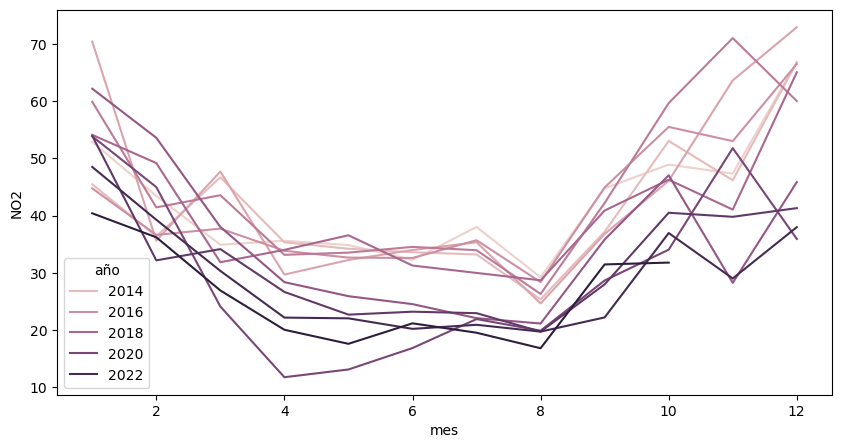

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

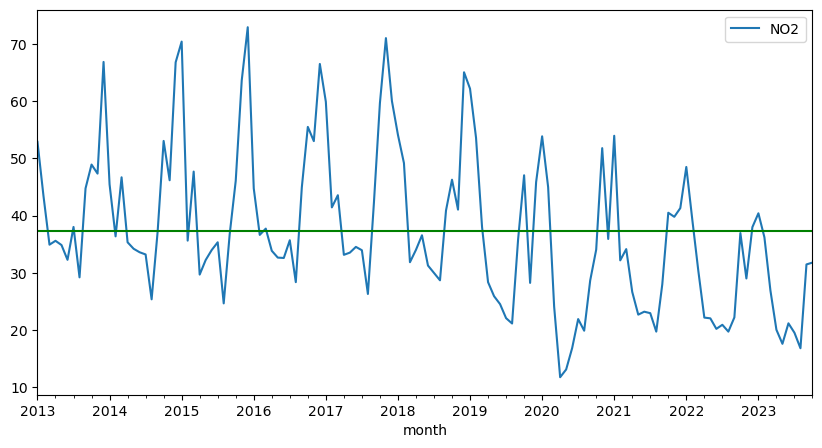

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

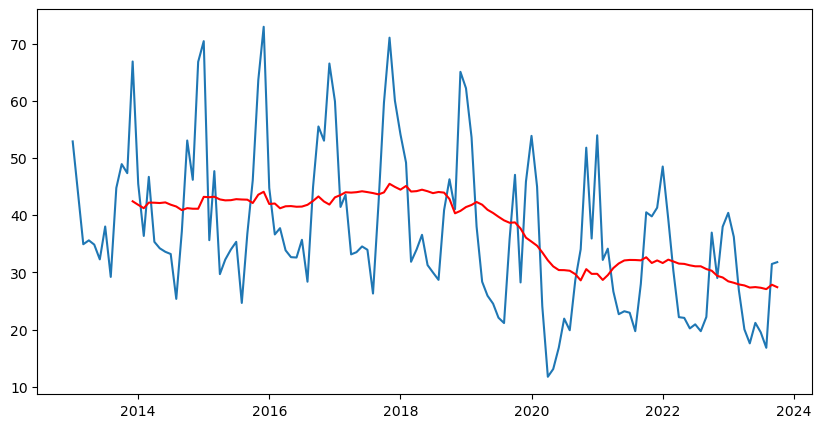

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(0.17985699483588177,
 0.9711089335577457,
 12,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 806.2001082161138)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats 0.17985699483588177
p-value 0.9711089335577457
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6876305690033362
2 mes Lag, 0.43405076079077326
3 mes Lag, 0.1906859629330851
4 mes Lag, -0.0890838770546133
5 mes Lag, -0.24023307491294663
6 mes Lag, -0.29162719484878424
7 mes Lag, -0.27542882372918465
8 mes Lag, -0.10714582585160627
9 mes Lag, 0.16090967749918825
10 mes Lag, 0.4233469206077268
11 mes Lag, 0.6527824939058794
12 mes Lag, 0.8007780558962515
13 mes Lag, 0.6827800761527126
14 mes Lag, 0.41397931363783835
15 mes Lag, 0.15837025831052995
16 mes Lag, -0.1363671441513418
17 mes Lag, -0.32500965410675475
18 mes Lag, -0.3647837971175909
19 mes Lag, -0.34787609898830957
20 mes Lag, -0.1827441093022147
21 mes Lag, 0.09381571253777127
22 mes Lag, 0.3155453376944254
23 mes Lag, 0.6239112206039382
24 mes Lag, 0.7632756332017686
25 mes Lag, 0.6139345128917827
26 mes Lag, 0.39677454170256143
27 mes Lag, 0.13330801641912052
28 mes Lag, -0.1754263406653733
29 mes Lag, -0.3617694037501083
30 mes Lag, -0.42676423532728885
31 mes Lag, -0.3951134411450456
32 me

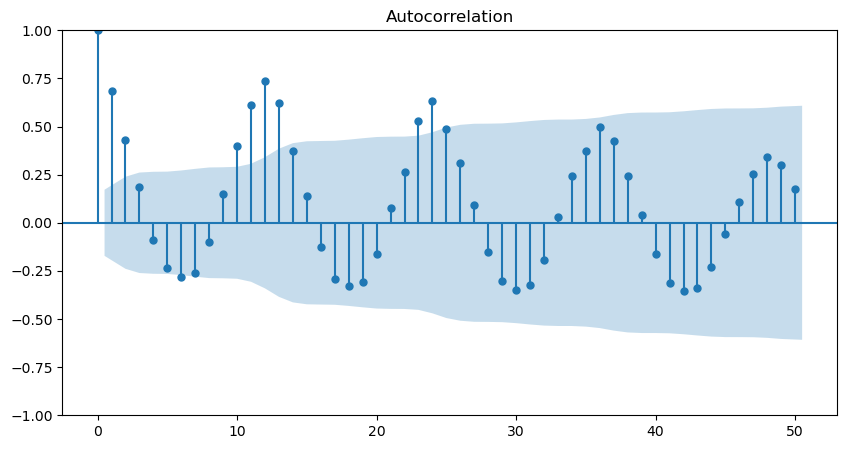

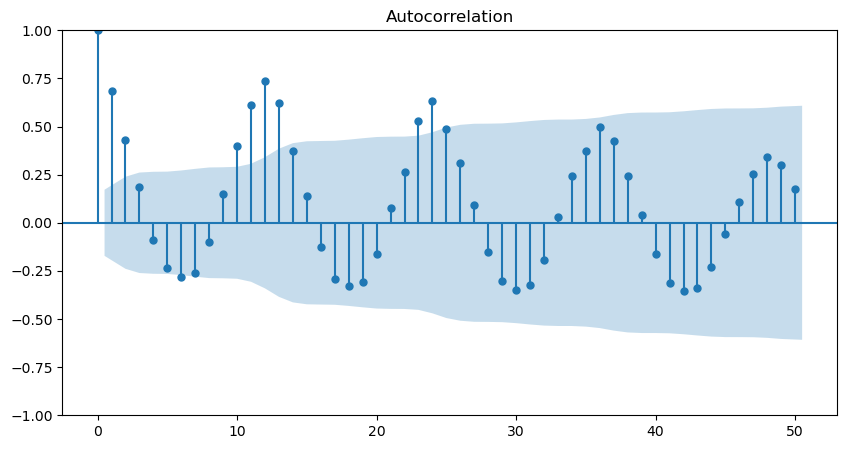

In [14]:
plot_acf(df, lags = 50)

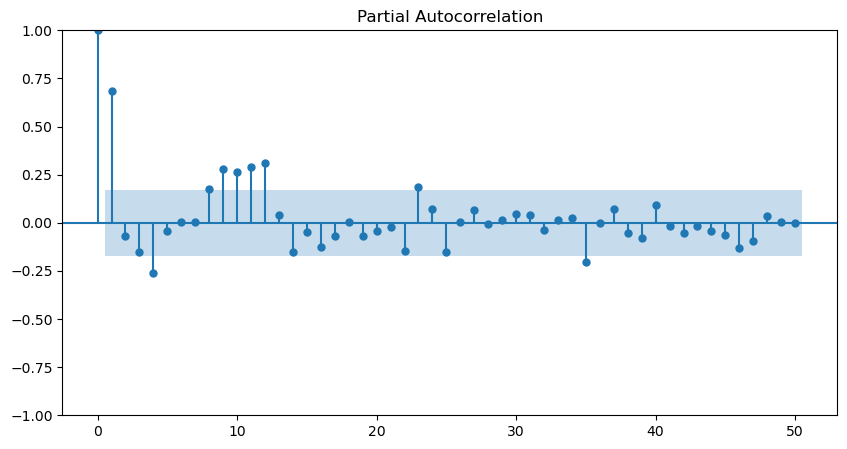

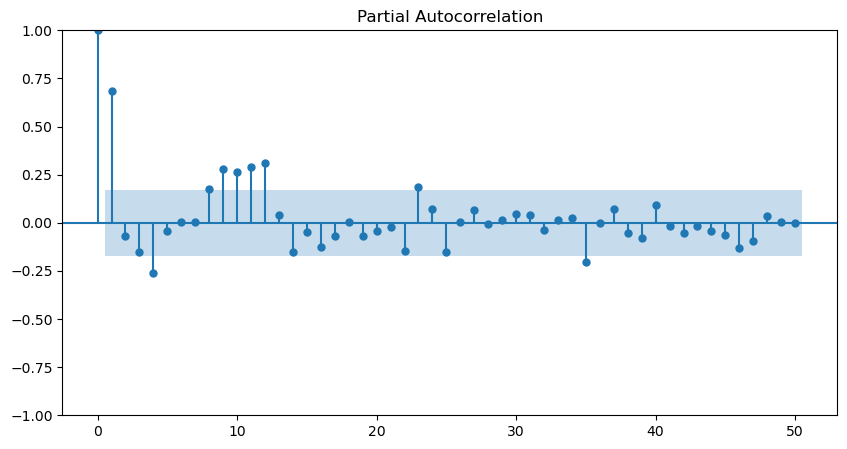

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 62%|██████▎   | 15/24 [00:00<00:00, 26.40it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 688 ms
Wall time: 1.23 s


In [22]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
2,8.753475,"(0, 1, 2)"
12,8.778069,"(2, 1, 0)"
1,8.778764,"(0, 1, 1)"
6,8.791706,"(1, 1, 0)"
13,8.887527,"(2, 1, 1)"


In [23]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(0, 1, 2, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.75241537296031
CPU times: total: 46.9 ms
Wall time: 156 ms


,real,pred,error
2021-05-01,22.709677,24.821619,2.111942
2021-06-01,23.225806,24.608297,1.382491
2021-07-01,22.967742,25.843102,2.875360
2021-08-01,19.741935,22.911019,3.169084
2021-09-01,28.000000,34.924218,6.924218
2021-10-01,40.516129,43.381699,2.865570
2021-11-01,39.806452,46.162966,6.356514
2021-12-01,41.322581,48.518583,7.196002
2022-01-01,48.516129,55.373942,6.857813
2022-02-01,39.290323,40.813214,1.522891


In [24]:
pred["real_test"] = y_test

In [25]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,46.275022
2023-12-01,48.247680
2024-01-01,55.343125
2024-02-01,40.630554
2024-03-01,32.980744
2024-04-01,24.589131
2024-05-01,24.029929
2024-06-01,24.276679
2024-07-01,25.706874
2024-08-01,22.830253


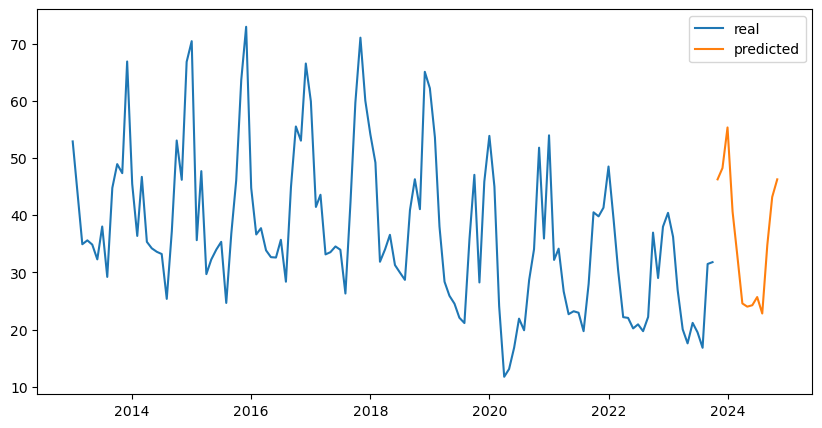

In [26]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [27]:
pred_año.mean()

predicted_mean    36.088722
dtype: float64

In [28]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-11-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-11-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2023-10-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

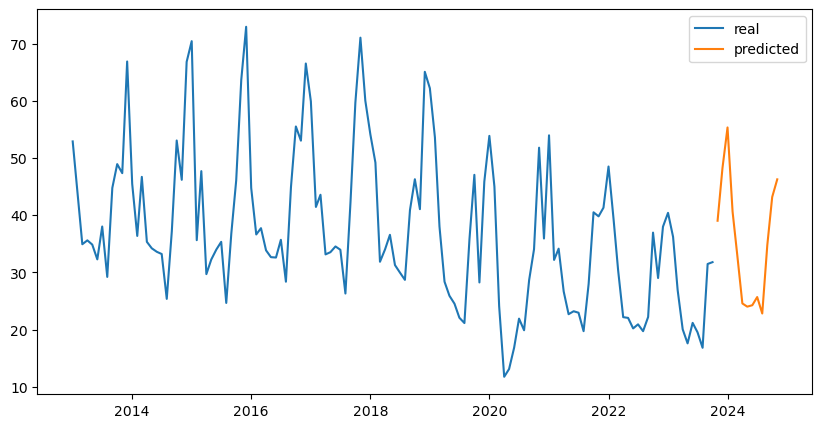

In [29]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [30]:
pred_año.mean()

predicted_mean    35.532239
dtype: float64